# Data Analysis for Voting

Import modules

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
from statsmodels.formula.api import glm 

Import all the results from the voting ABM and add a column with the sim number

In [4]:
base_dir = "C:/Users/hugov/Github/Bachelor-project/Data/Voting_results"

# Define the ranges for the file names
range_1 = range(1, 26)
range_2 = [500]

# Dictionary to store the data frames
voting_results = {}

# Loop over the ranges and read the files dynamically
for i in range_1:
    for j in range_2:
        # Construct the file name
        file_name = f"realistic_voting_results{i}_{j}.csv"
        file_path = os.path.join(base_dir, file_name)
        
        # Read the CSV file and store it in the dictionary
        if os.path.exists(file_path):
            data_name = f"voting_results{i}_{j}"
            df = pd.read_csv(file_path)
            df["sim"] = i  # Add `i` as a column
            voting_results[data_name] = df
        else:
            print(f"File not found: {file_path}")

# Combine all DataFrames into one
combined_voting_results = pd.concat(voting_results.values(), ignore_index=True)
sim1 = voting_results.get("voting_results1_500")

View example df

In [5]:
pd.set_option('display.max_columns', None)  # Show all columns
print(voting_results.get("voting_results1_500").head(50))


    who       color  heading       xcor       ycor     shape label  \
0     0  100.457427       30  49.875958 -27.332296  "person"    ""   
1     0  100.457427       30  49.875958 -27.332296  "person"    ""   
2     0  100.457427       30  49.875958 -27.332296  "person"    ""   
3     0  100.457427       30  49.875958 -27.332296  "person"    ""   
4     0  100.457427       30  49.875958 -27.332296  "person"    ""   
5     0  100.457427       30  49.875958 -27.332296  "person"    ""   
6     0  100.457427       30  49.875958 -27.332296  "person"    ""   
7     0  100.457427       30  49.875958 -27.332296  "person"    ""   
8     0  100.457427       30  49.875958 -27.332296  "person"    ""   
9     0  100.457427       30  49.875958 -27.332296  "person"    ""   
10    1  100.000000      111 -30.630094 -10.927240  "person"    ""   
11    1  100.000000      111 -30.630094 -10.927240  "person"    ""   
12    1  100.000000      111 -30.630094 -10.927240  "person"    ""   
13    1  100.000000 

Plot vote outcome per sim in full democracy

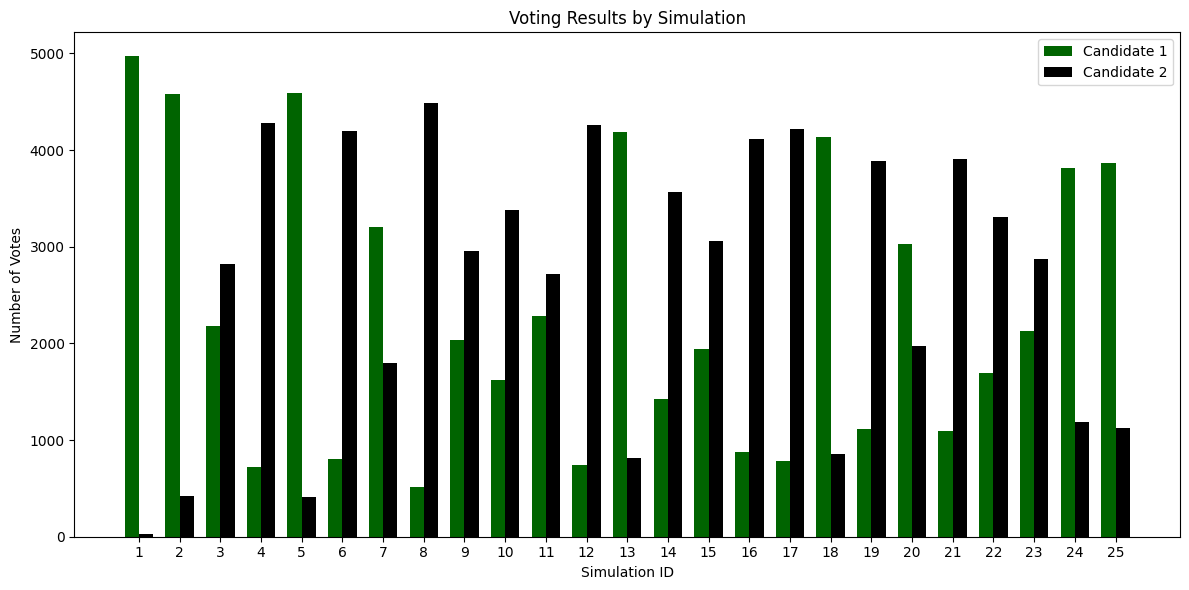

In [6]:

# Step 1: Aggregate results
vote_counts = combined_voting_results.groupby(['sim', 'Vote']).size().unstack(fill_value=0)

# Ensure all simulations and candidates are represented
vote_counts = vote_counts.reindex(index=range(1, 26), columns=['Candidate_0', 'Candidate_1'], fill_value=0)

# Step 2: Prepare data for plotting
simulations = vote_counts.index
candidate_1_votes = vote_counts['Candidate_0']
candidate_2_votes = vote_counts['Candidate_1']

# Step 3: Plot with Matplotlib
bar_width = 0.35
x_indices = np.arange(len(simulations))

plt.figure(figsize=(12, 6))

# Bars for Candidate 1
plt.bar(x_indices - bar_width/2, candidate_1_votes, width=bar_width, label='Candidate 1', color='darkgreen')

# Bars for Candidate 2
plt.bar(x_indices + bar_width/2, candidate_2_votes, width=bar_width, label='Candidate 2', color='black')

# Customize plot
plt.xlabel('Simulation ID')
plt.ylabel('Number of Votes')
plt.title('Voting Results by Simulation')
plt.xticks(x_indices, simulations)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Plot cumulative voting from all sims in full democracy

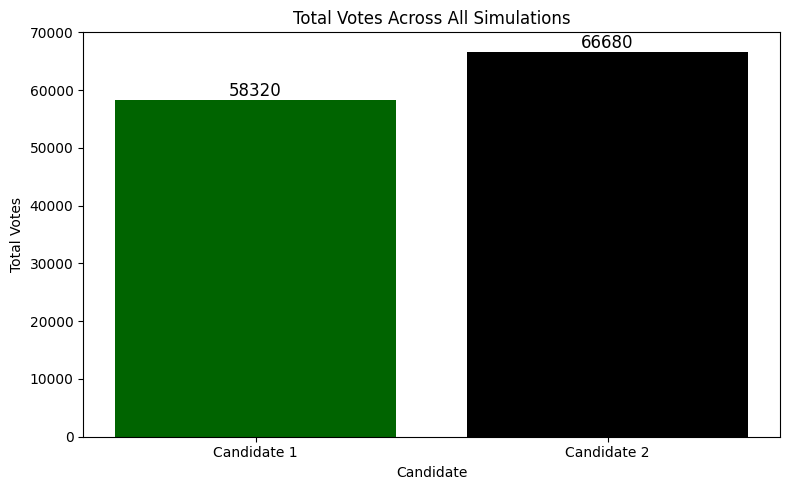

In [7]:

# Step 1: Aggregate results across all simulations
total_votes = combined_voting_results.groupby('Vote').size()
total_votes = total_votes.reindex(['Candidate_0', 'Candidate_1'], fill_value=0)

# Rename the indices to your preferred names
total_votes.index = ['Candidate 1', 'Candidate 2']

# Step 2: Prepare data for plotting
candidates = total_votes.index
votes = total_votes.values

# Step 3: Plot with Matplotlib
plt.figure(figsize=(8, 5))

# Bars for each candidate
bars = plt.bar(candidates, votes, color=['darkgreen', 'black'])

# Add labels on top of each bar
for bar, vote_count in zip(bars, votes):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center the text horizontally
        bar.get_height(),                  # Position it at the top of the bar
        f'{vote_count}',                   # The vote count as the label
        ha='center',                       # Center align the text
        va='bottom',                       # Align text just above the bar
        fontsize=12,                       # Font size for visibility
        color='black'                      # Text color
    )

# Customize plot
plt.xlabel('Candidate')
plt.ylabel('Total Votes')
plt.title('Total Votes Across All Simulations')
plt.tight_layout()

# Show the plot
plt.show()



Plot sim specific vote outcome in restricted suffrage epistocracy, removing everyone with information-level under 10

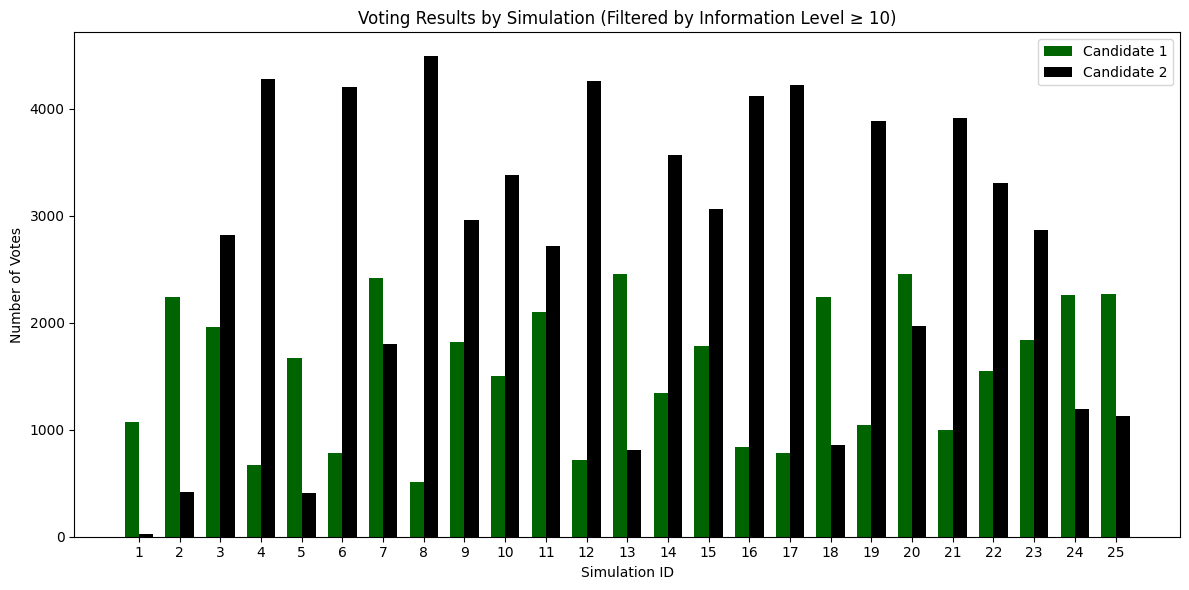

In [8]:
# Step 0: Filter out rows where information-level < 10
restricted_suffrage_results = combined_voting_results[combined_voting_results['information-level'] >= 10]

# Step 1: Aggregate results
vote_counts = restricted_suffrage_results.groupby(['sim', 'Vote']).size().unstack(fill_value=0)

# Ensure all simulations and candidates are represented
vote_counts = vote_counts.reindex(index=range(1, 26), columns=['Candidate_0', 'Candidate_1'], fill_value=0)

# Step 2: Prepare data for plotting
simulations = vote_counts.index
candidate_1_votes = vote_counts['Candidate_0']
candidate_2_votes = vote_counts['Candidate_1']

# Step 3: Plot with Matplotlib
bar_width = 0.35
x_indices = np.arange(len(simulations))

plt.figure(figsize=(12, 6))

# Bars for Candidate 1
plt.bar(x_indices - bar_width / 2, candidate_1_votes, width=bar_width, label='Candidate 1', color='darkgreen')

# Bars for Candidate 2
plt.bar(x_indices + bar_width / 2, candidate_2_votes, width=bar_width, label='Candidate 2', color='black')

# Customize plot
plt.xlabel('Simulation ID')
plt.ylabel('Number of Votes')
plt.title('Voting Results by Simulation (Filtered by Information Level ≥ 10)')
plt.xticks(x_indices, simulations)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Plot same restricted suffrage for all sims cumulated

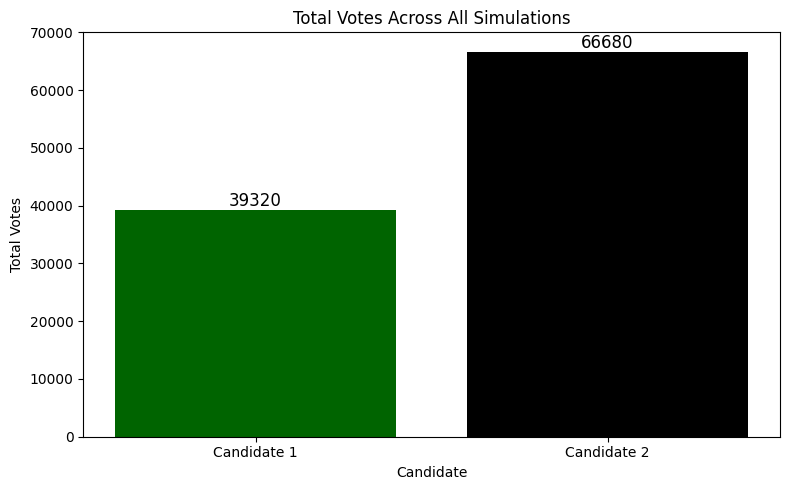

In [9]:
# Step 1: Aggregate results across all simulations
total_votes = restricted_suffrage_results.groupby('Vote').size()
total_votes = total_votes.reindex(['Candidate_0', 'Candidate_1'], fill_value=0)

# Rename the indices to your preferred names
total_votes.index = ['Candidate 1', 'Candidate 2']

# Step 2: Prepare data for plotting
candidates = total_votes.index
votes = total_votes.values

# Step 3: Plot with Matplotlib
plt.figure(figsize=(8, 5))

# Bars for each candidate
bars = plt.bar(candidates, votes, color=['darkgreen', 'black'])

# Add labels on top of each bar
for bar, vote_count in zip(bars, votes):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center the text horizontally
        bar.get_height(),                  # Position it at the top of the bar
        f'{vote_count}',                   # The vote count as the label
        ha='center',                       # Center align the text
        va='bottom',                       # Align text just above the bar
        fontsize=12,                       # Font size for visibility
        color='black'                      # Text color
    )

# Customize plot
plt.xlabel('Candidate')
plt.ylabel('Total Votes')
plt.title('Total Votes Across All Simulations')
plt.tight_layout()

# Show the plot
plt.show()

Now plotting for plural voting for each sim

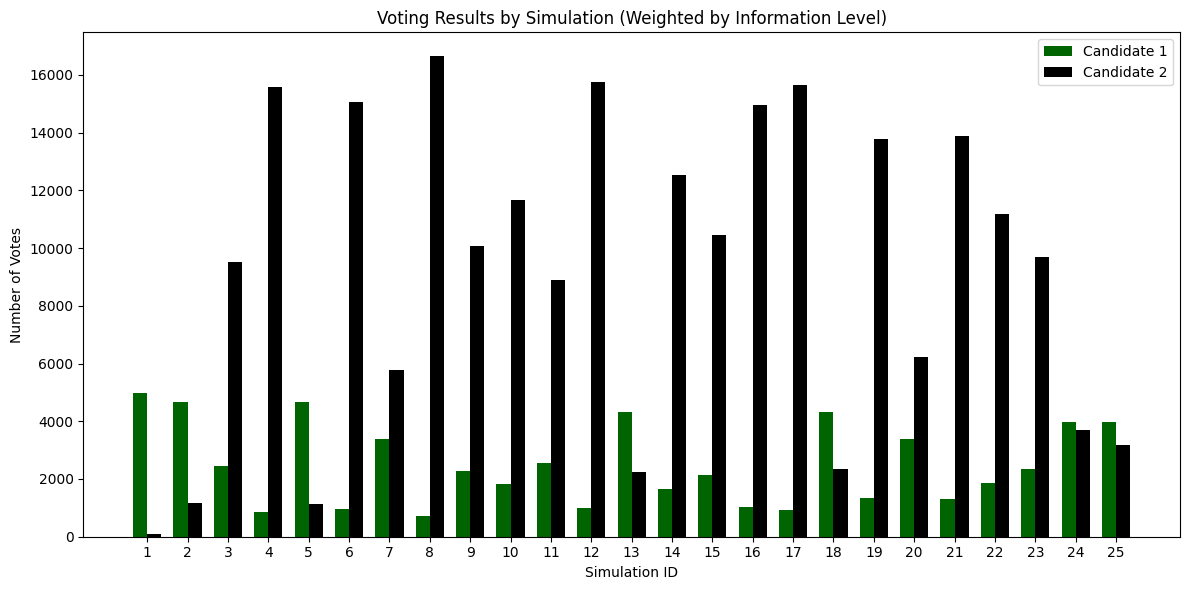

In [10]:
# Step 0: Adjust vote counts based on information-level
plural_voting_results = combined_voting_results.copy()

# Duplicate rows for information-level > 50 (additional vote)
extra_votes_50 = plural_voting_results[plural_voting_results['information-level'] > 50]
plural_voting_results = pd.concat([plural_voting_results, extra_votes_50])

# Duplicate rows again for information-level > 75 (additional vote on top of > 50)
extra_votes_75 = plural_voting_results[plural_voting_results['information-level'] > 75]
plural_voting_results = pd.concat([plural_voting_results, extra_votes_75])

# Step 1: Aggregate results
vote_counts = plural_voting_results.groupby(['sim', 'Vote']).size().unstack(fill_value=0)

# Ensure all simulations and candidates are represented
vote_counts = vote_counts.reindex(index=range(1, 26), columns=['Candidate_0', 'Candidate_1'], fill_value=0)

# Step 2: Prepare data for plotting
simulations = vote_counts.index
candidate_1_votes = vote_counts['Candidate_0']
candidate_2_votes = vote_counts['Candidate_1']

# Step 3: Plot with Matplotlib
bar_width = 0.35
x_indices = np.arange(len(simulations))

plt.figure(figsize=(12, 6))

# Bars for Candidate 1
plt.bar(x_indices - bar_width / 2, candidate_1_votes, width=bar_width, label='Candidate 1', color='darkgreen')

# Bars for Candidate 2
plt.bar(x_indices + bar_width / 2, candidate_2_votes, width=bar_width, label='Candidate 2', color='black')

# Customize plot
plt.xlabel('Simulation ID')
plt.ylabel('Number of Votes')
plt.title('Voting Results by Simulation (Weighted by Information Level)')
plt.xticks(x_indices, simulations)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Cumulative plot of plural voting

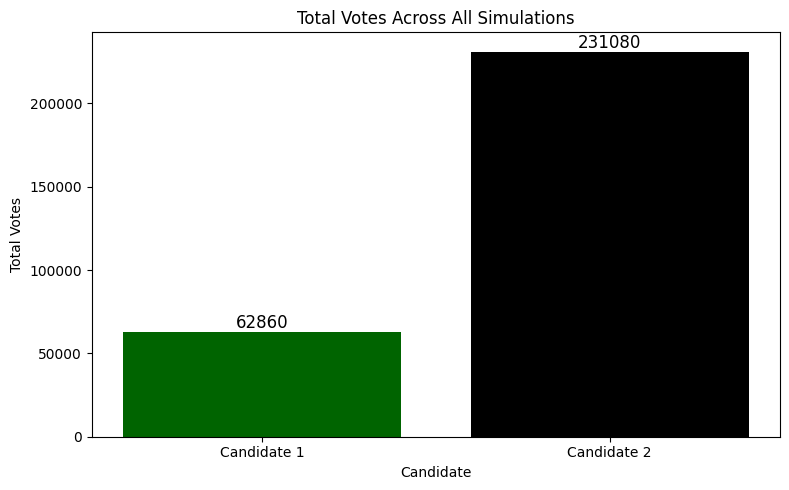

In [11]:
# Step 1: Aggregate results across all simulations
total_votes = plural_voting_results.groupby('Vote').size()
total_votes = total_votes.reindex(['Candidate_0', 'Candidate_1'], fill_value=0)

# Rename the indices to your preferred names
total_votes.index = ['Candidate 1', 'Candidate 2']

# Step 2: Prepare data for plotting
candidates = total_votes.index
votes = total_votes.values

# Step 3: Plot with Matplotlib
plt.figure(figsize=(8, 5))

# Bars for each candidate
bars = plt.bar(candidates, votes, color=['darkgreen', 'black'])

# Add labels on top of each bar
for bar, vote_count in zip(bars, votes):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center the text horizontally
        bar.get_height(),                  # Position it at the top of the bar
        f'{vote_count}',                   # The vote count as the label
        ha='center',                       # Center align the text
        va='bottom',                       # Align text just above the bar
        fontsize=12,                       # Font size for visibility
        color='black'                      # Text color
    )

# Customize plot
plt.xlabel('Candidate')
plt.ylabel('Total Votes')
plt.title('Total Votes Across All Simulations')
plt.tight_layout()

# Show the plot
plt.show()

Running binary logistic regression glm on impact of restricted suffrage

In [12]:
# Rename the column
combined_voting_results.rename(columns={'information-level': 'information_level'}, inplace=True)

# Step 1: Prepare your data
# Assuming `combined_voting_results` is your dataframe
# 1. Add a binary column for 'exclusion' based on information-level
combined_voting_results['exclude'] = (combined_voting_results['information_level'] < 10).astype(int)

# 2. Create a new column where 'Vote' indicates the chosen candidate (binary: 0 for Candidate_0, 1 for Candidate_1)
combined_voting_results['vote_binary'] = combined_voting_results['Vote'].apply(lambda x: 0 if x == 'Candidate_0' else 1)

# Step 2: Run GLM (logistic regression model)
# Independent variables: 'exclude' (whether the vote was excluded due to information-level) and other covariates
# Dependent variable: 'vote_binary' (which candidate was chosen)
formula = 'vote_binary ~ exclude + information_level'
model = sm.formula.glm(formula=formula, data=combined_voting_results, family=sm.families.Binomial()).fit()

# Step 3: Print the summary to check the significance of 'exclude'
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            vote_binary   No. Observations:               125000
Model:                            GLM   Df Residuals:                   124997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15938.
Date:                Fri, 06 Dec 2024   Deviance:                       31876.
Time:                        18:37:46   Pearson chi2:                 4.63e+04
No. Iterations:                    28   Pseudo R-squ. (CS):             0.6759
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -10.0739      0.08

In [13]:
# Rename the column
combined_voting_results.rename(columns={'information-level': 'information_level'}, inplace=True)

# Step 1: Prepare your data
# Assuming `combined_voting_results` is your dataframe
# 1. Add a binary column for 'exclusion' based on information-level
combined_voting_results['exclude'] = (combined_voting_results['information_level'] < 10).astype(int)

# 2. Create a new column where 'Vote' indicates the chosen candidate (binary: 0 for Candidate_0, 1 for Candidate_1)
combined_voting_results['vote_binary'] = combined_voting_results['Vote'].apply(lambda x: 0 if x == 'Candidate_0' else 1)

# Step 2: Run GLM (logistic regression model)
# Independent variables: 'exclude' (whether the vote was excluded due to information-level) and other covariates
# Dependent variable: 'vote_binary' (which candidate was chosen)
formula = 'vote_binary ~ information_level + exclude'
model = sm.formula.glm(formula=formula, data=combined_voting_results, family=sm.families.Binomial()).fit()

# Step 3: Print the summary to check the significance of 'exclude'
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            vote_binary   No. Observations:               125000
Model:                            GLM   Df Residuals:                   124997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15938.
Date:                Fri, 06 Dec 2024   Deviance:                       31876.
Time:                        18:37:47   Pearson chi2:                 4.63e+04
No. Iterations:                    28   Pseudo R-squ. (CS):             0.6759
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -10.0739      0.08

In [14]:
print(combined_voting_results.tail(50))

        who       color  heading       xcor       ycor     shape label  \
124950  495  100.310223      215  34.103107 -44.645957  "person"    ""   
124951  495  100.310223      215  34.103107 -44.645957  "person"    ""   
124952  495  100.310223      215  34.103107 -44.645957  "person"    ""   
124953  495  100.310223      215  34.103107 -44.645957  "person"    ""   
124954  495  100.310223      215  34.103107 -44.645957  "person"    ""   
124955  495  100.310223      215  34.103107 -44.645957  "person"    ""   
124956  495  100.310223      215  34.103107 -44.645957  "person"    ""   
124957  495  100.310223      215  34.103107 -44.645957  "person"    ""   
124958  495  100.310223      215  34.103107 -44.645957  "person"    ""   
124959  495  100.310223      215  34.103107 -44.645957  "person"    ""   
124960  496  107.887339      120  19.956644 -51.534733  "person"    ""   
124961  496  107.887339      120  19.956644 -51.534733  "person"    ""   
124962  496  107.887339      120  19.9

Run a model on plural voting

In [15]:
# Rename the column
plural_voting_results.rename(columns={'information-level': 'information_level'}, inplace=True)

# Step 1: Prepare your data
# Assuming `combined_voting_results` is your dataframe
# 1. Add a binary column for 'exclusion' based on information-level
plural_voting_results['multiplied'] = (plural_voting_results['information_level'] > 50).astype(int)

# 2. Create a new column where 'Vote' indicates the chosen candidate (binary: 0 for Candidate_0, 1 for Candidate_1)
plural_voting_results['vote_binary'] = plural_voting_results['Vote'].apply(lambda x: 0 if x == 'Candidate_0' else 1)

# Step 2: Run GLM (logistic regression model)
# Independent variables: 'exclude' (whether the vote was excluded due to information-level) and other covariates
# Dependent variable: 'vote_binary' (which candidate was chosen)
formula = 'vote_binary ~ multiplied + information_level'
model = sm.formula.glm(formula=formula, data=plural_voting_results, family=sm.families.Binomial()).fit()

# Step 3: Print the summary to check the significance of 'exclude'
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            vote_binary   No. Observations:               293940
Model:                            GLM   Df Residuals:                   293937
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26184.
Date:                Fri, 06 Dec 2024   Deviance:                       52368.
Time:                        18:37:50   Pearson chi2:                 8.25e+04
No. Iterations:                    30   Pseudo R-squ. (CS):             0.5768
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -35.1952   1.63e+0

### Models for restricted suffrage and plural voting compared to normal democracy

In [16]:
restricted_suffrage_results['source'] = 'restricted'
combined_voting_results['source'] = 'combined'

combined_data = pd.concat([restricted_suffrage_results, combined_voting_results], ignore_index=True)
combined_data['vote_binary'] = np.where(combined_data['Vote'] == 'Candidate_1', 1, 0)
model = smf.logit(formula='vote_binary ~ source', data=combined_data)
result = model.fit()
print(result.summary())



C:\Users\hugov\AppData\Local\Temp\ipykernel_29972\170046133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restricted_suffrage_results['source'] = 'restricted'


Optimization terminated successfully.
         Current function value: 0.676476
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            vote_binary   No. Observations:               231000
Model:                          Logit   Df Residuals:                   230998
Method:                           MLE   Df Model:                            1
Date:                Fri, 06 Dec 2024   Pseudo R-squ.:                0.006853
Time:                        18:37:51   Log-Likelihood:            -1.5627e+05
converged:                       True   LL-Null:                   -1.5734e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1340      0.006     23.628      0.000       0.123       0.145

In [17]:
plural_voting_results['source'] = 'plural_voting'
combined_voting_results['source'] = 'combined'

combined_data = pd.concat([plural_voting_results, combined_voting_results], ignore_index=True)
combined_data['vote_binary'] = np.where(combined_data['Vote'] == 'Candidate_1', 1, 0)
model = smf.logit(formula='vote_binary ~ source', data=combined_data)
result = model.fit()
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.570305
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            vote_binary   No. Observations:               418940
Model:                          Logit   Df Residuals:                   418938
Method:                           MLE   Df Model:                            1
Date:                Fri, 06 Dec 2024   Pseudo R-squ.:                 0.05183
Time:                        18:37:54   Log-Likelihood:            -2.3892e+05
converged:                       True   LL-Null:                   -2.5198e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.1340      0.006     23.628      0.000       0.123   

### Statistical hypothesis testing

In [18]:
restricted_suffrage_votes = restricted_suffrage_results.groupby('Vote').size()
combined_voting_votes = combined_voting_results.groupby('Vote').size()
restricted_suffrage_percentages = restricted_suffrage_votes / restricted_suffrage_votes.sum()
combined_voting_percentages = combined_voting_votes / combined_voting_votes.sum()
from scipy.stats import chi2_contingency
contingency_table = pd.concat(
    [restricted_suffrage_votes, combined_voting_votes], axis=1, keys=['Restricted', 'Combined']
).fillna(0)
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2_stat, "P-value:", p_value)


Chi-squared statistic: 2148.6315024057258 P-value: 0.0


In [19]:
plural_voting_votes = plural_voting_results.groupby('Vote').size()
combined_voting_votes = combined_voting_results.groupby('Vote').size()
pluraL_voting_percentages = plural_voting_votes / plural_voting_votes.sum()
combined_voting_percentages = combined_voting_votes / combined_voting_votes.sum()
from scipy.stats import chi2_contingency
contingency_table = pd.concat(
    [plural_voting_votes, combined_voting_votes], axis=1, keys=['Plural_voting', 'Combined']
).fillna(0)
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2_stat, "P-value:", p_value)

Chi-squared statistic: 27241.912953013205 P-value: 0.0
